<a href="https://colab.research.google.com/github/Falconly/Machine_learning/blob/main/Linear_Regression_numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
path_dataset = '/content/drive/MyDrive/dataset.csv'
data = pd.read_csv(path_dataset, sep=';')

In [63]:
data

,№ хозяйства,"Качество почв, балл (x)","Урожайность от пшеницы, т/га (y)"
0,1,65,2
1,2,80,3
2,3,55,"1,5"
3,4,45,"1,5"
4,5,88,"3,5"
5,6,88,"3,5"
6,7,90,"3,5"
7,8,78,"2,5"
8,9,65,2
9,10,70,2


In [64]:
data.drop(columns=['№ хозяйства'], inplace=True)

In [65]:
data.columns = ['x', 'y']

In [66]:
data['y'] = np.char.replace(data['y'].values.astype(str), ',', '.').astype(np.float32)

<Axes: xlabel='x', ylabel='y'>

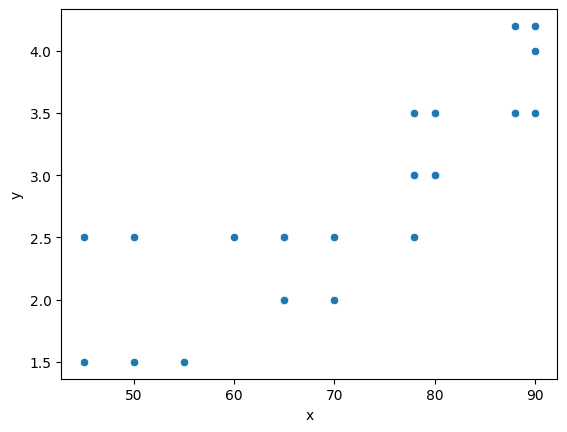

In [67]:
sns.scatterplot(data, x='x', y='y')

In [68]:
def mean_squared_error(y, y_pred):
  return np.mean(np.square(y - y_pred))

## Частные производные коэффициентов $b_0$ и $b_1$:
$\frac {∂J}{∂b_0} = - \frac {1}{n}(y_i-b_1*x_i-b_0)$  

$\frac {∂J}{db_1} = \frac {1}{n}(y_i-b_1*x_i-b_0)*(-x_i)$

In [69]:
def derivate_b1(y, b1, x, b0, n):
  return np.sum((y - b1 * x - b0) * (-x)) / n

def derivate_b0(y, b1, x, b0, n):
  return np.sum(-(y-b1*x-b0)) / n

In [70]:
X = data['x'].values
y = data['y'].values

## С помощью градиентного спуска

In [71]:
b0 = 0
b1 = 0

lr = 0.0001
epochs = 10
batch = 4

In [72]:
error_lst = []
b0_lst = []
b1_lst = []

In [73]:

for i in range(epochs):
  pred = b0 + b1 * X

  error_lst.append(mean_squared_error(pred, y))

  b0_lst.append(b0)
  b1_lst.append(b1)

  b0 = b0 - lr * derivate_b0(y, b1, X, b0, X.shape[0])
  b1 = b1 - lr * derivate_b1(y, b1, X, b0, X.shape[0])

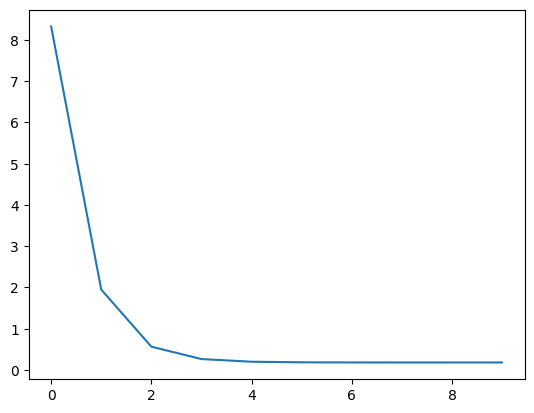

In [74]:

plt.plot(range(len(error_lst)), error_lst)

In [75]:
print(f'Полученные коэффициенты: b0 {round(b0, 5)}, b1 {round(b1, 5)}')

Полученные коэффициенты: b0 0.0005, b1 0.03902


In [76]:
b0 + b1 * 80

3.1221447418633432

In [77]:
mse = 0
rmse = 0
mae = 0

In [78]:
for i in range(len(X)):
  pred = b0 + b1 * X[i]
  mse = mean_squared_error(y[i], pred)
  mae = y[i] - pred

In [79]:
mse = mse / len(X)
rmse = np.sqrt(mse)
mae = mae / len(X)

In [80]:
print(f'MAE: {mae}, MSE: {mse}, RMSE: {rmse}')

MAE: -0.01789455122876742, MSE: 0.009606448910369447, RMSE: 0.09801249364427704


## С помощью метода наименьших квадратов

In [81]:
x_mean = data['x'].mean()
y_mean = data['y'].mean()

In [82]:
b1 = np.sum(((X - x_mean) * (y - y_mean)))/np.sum(np.square((X-x_mean)))
b0 = y_mean - b1 * x_mean

In [83]:
print(f'Коэффициента, полученные с помощью метода наименьших квадратов: b1: {b1}, b0: {b0}')

Коэффициента, полученные с помощью метода наименьших квадратов: b1: 0.04808021578624049, b0: -0.6721595220622967


In [84]:
mse = 0
rmse = 0
mae = 0

In [85]:
for i in range(len(X)):
  pred = b0 + b1 * X[i]
  mse = mean_squared_error(y[i], pred)
  mae = y[i] - pred

In [86]:
mse = mse / len(X)
rmse = np.sqrt(mse)
mae = mae / len(X)

In [87]:
print(f'MAE: {mae}, MSE: {mse}, RMSE: {rmse}')

MAE: -0.015101816801444512, MSE: 0.006841946121131753, RMSE: 0.08271605721461675


## С помощью метода наименьших квадратов метрики получаются меньше, чем при градиентном спуске.